# Inspecting the dataset

Let's first load our challenge dataset. We will download the data from the Kaggle website and load it using a pandas dataframe:

In [1]:
import pandas as pd

loan_dataset = pd.read_csv("../datasets/loan_train.csv", index_col=0)
loan_dataset.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation
0,1,0,MT04PA,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,True,MZ10CD
1,1,0,MT04PA,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,True,MZ10CD
2,1,0,MT04PA,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,True,MZ10CD
3,1,0,MT04PA,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,True,MZ10CD
4,1,0,MT04PA,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,True,MZ10CD


Let's inspect the columns of the dataset:

In [2]:
loan_dataset.columns

Index(['minority', 'sex', 'ZIP', 'rent', 'education', 'age', 'income',
       'loan_size', 'payment_timing', 'year', 'job_stability', 'default',
       'occupation'],
      dtype='object')

Let's inspect the number of observations:

In [3]:
len(loan_dataset)

480000

Let's define which features of the dataset are numerical and which categorical:



In [9]:
numeric_features = [
    "education", "age", "income", "loan_size", 
    "payment_timing", "year", "job_stability"
]

categorical_features = ["ZIP", "rent", "occupation"]

Let's create the `X` and `y` of our ML problem:

In [10]:
X = loan_dataset.copy().drop(["minority", "default"], axis=1)
y = loan_dataset.copy()["default"]

# Visually inspect minority distribution

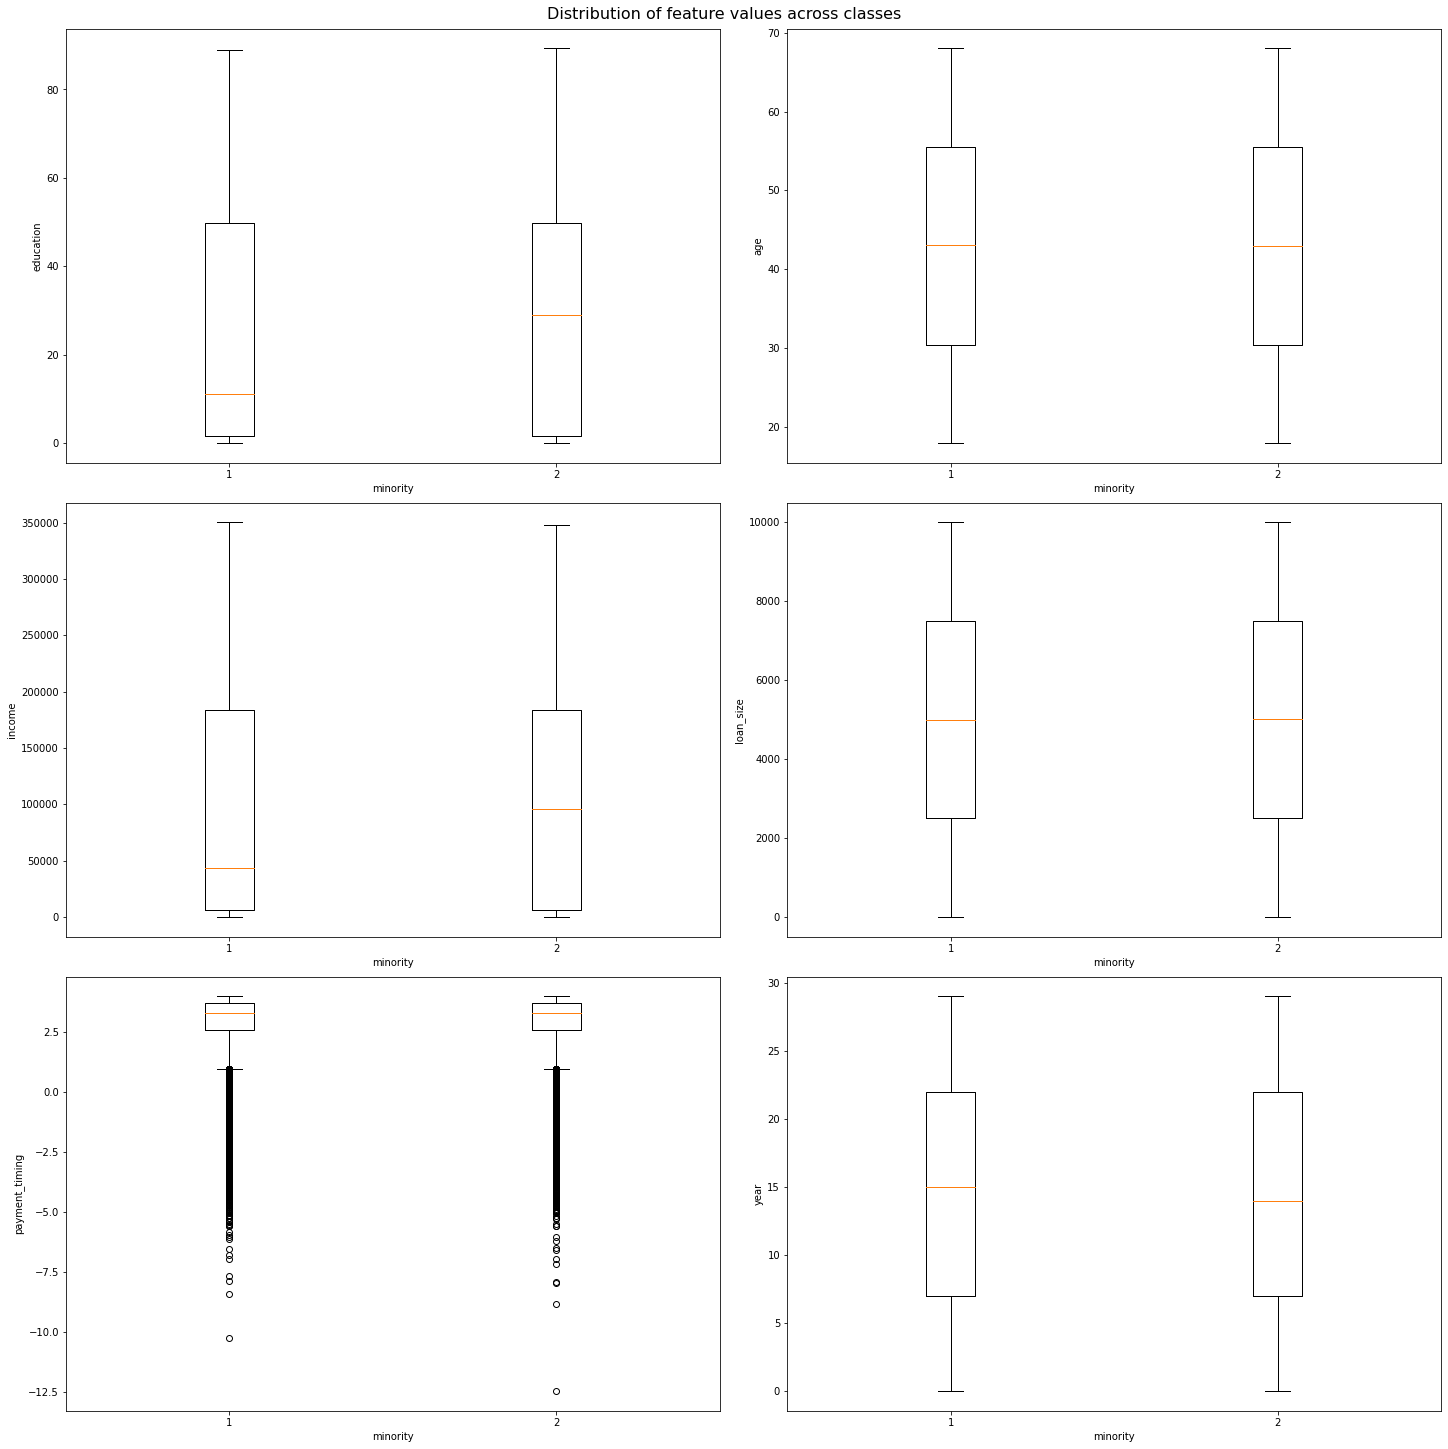

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define number of columns and rows
nrows = int(len(numeric_features)/2)
ncols = 2

# Create figure
fig, axes = plt.subplots(nrows, ncols, figsize=(20,20), constrained_layout=True)
fig.suptitle("Distribution of feature values across classes", fontsize=16)

# Iterate over axes (subfigures)
for idx, ax in enumerate(axes.flatten()):
    
    # Create list of feature values per class
    feature_by_class = [
        (loan_dataset.loc[loan_dataset["minority"]==c]
         [numeric_features[idx]].values)
        for c in set(loan_dataset["minority"])
    ]
        
    # Create boxplot
    ax.boxplot(feature_by_class)
    #sns.violinplot(feature_by_class)
    # sns.violinplot(
    #     x="minority", y=numeric_features[idx], data=loan_dataset, ax=ax
    # )
    
    # Set labels
    ax.set_xlabel("minority")
    ax.set_ylabel(f"{numeric_features[idx]}")

plt.show()

# Create ML model

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create preprocessor of features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create pipeline
clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
)

# Create cross-validatio strategy
cv = StratifiedKFold(n_splits=10)

# Compute accuracy of model
cv_results = cross_validate(
    clf, X, y, cv=cv
)

In [13]:
cv_results

{'fit_time': array([2.76707077, 2.31441712, 2.3128798 , 2.20377493, 2.14053202,
        2.40333629, 2.17268825, 2.12772918, 1.98811913, 3.06935382]),
 'score_time': array([0.05614805, 0.05787992, 0.04788899, 0.10627484, 0.04748392,
        0.0453198 , 0.04918766, 0.04908991, 0.05971885, 0.07643199]),
 'test_score': array([0.99975   , 0.9998125 , 0.99991667, 0.999875  , 0.99985417,
        0.99985417, 0.99983333, 0.99979167, 0.99995833, 0.99983333])}